# Обработка изображений. Домашняя работа

In [89]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import imageio

In [90]:
img = imageio.imread('dog_color.jpg')
img = img[:,:,:].astype(np.float32) / 255.
print(img.shape)

(485, 729, 3)


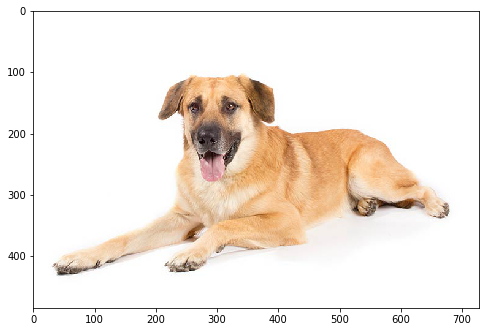

In [91]:
plt.figure(figsize=(8, 8))
plt.imshow(img)

#### Оконная функция (функция фильтра)

In [97]:
def filter_blur(x):
    # Box blur
    return np.mean(x)

#### функция преобразования RGB-изображения

In [98]:
def rgb_filter_blur(win_size, img):
    out_img = np.zeros(
        (img.shape[0] - win_size[0] + 1,
         img.shape[1] - win_size[1] + 1,
         3), 
         dtype=np.float32)
    
    print(out_img.shape)
    
    for k in range(out_img.shape[2]):
        for i in range(out_img.shape[0]):
            for j in range(out_img.shape[1]):
                x = img[i:i+win_size[0], j:j+win_size[1], k]
                out_img[i,j,k] = filter_blur(x)
                
    return out_img

(475, 719, 3)
CPU times: user 20.2 s, sys: 19.4 ms, total: 20.2 s
Wall time: 20.3 s


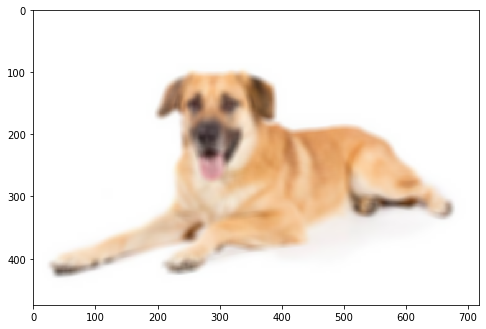

In [100]:
%%time
win_size = (11, 11) # размер окна
out_img = rgb_filter_blur(win_size, img)
plt.figure(figsize=(8, 8))
plt.imshow(out_img)

In [59]:
from skimage.color import rgb2hsv, hsv2rgb

#### функция типа преобразования HSV

In [73]:
 def kind(label_kind):
    if label_kind == 'hue':
        return 0
    if label_kind == 'saturation':
         return 1
    if label_kind == 'value':
        return 2
    raise ValueError('Undefined kind: {}'.format(label_kind))

#### функция фильтра преобразования HSV

In [78]:
def filter_hsv(img, label_kind, coef):
    img_hsv = np.copy(rgb2hsv(img))
    img_hsv[:, :, kind(label_kind)] *= coef

    return hsv2rgb(img_hsv)

#### Уменьшим до 10% значение 'hue'

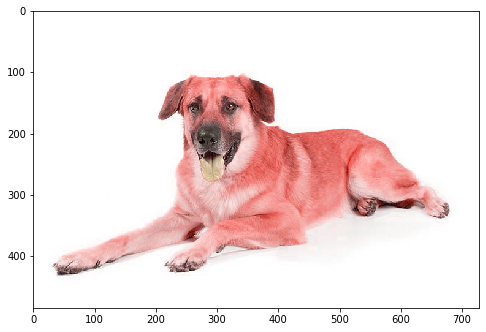

In [85]:
img_filter_hsv = filter_hsv(img,'hue', 0.1)
plt.figure(figsize=(8, 8))
plt.imshow(img_filter_hsv)

#### Уменьшим до 10% значение 'saturation'

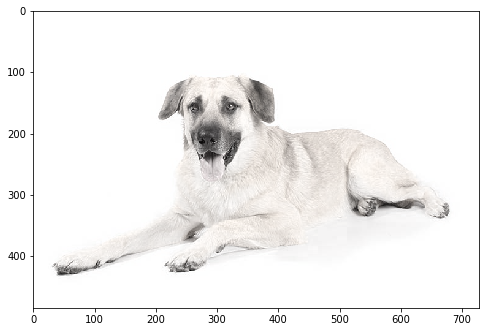

In [86]:
img_filter_hsv = filter_hsv(img,'saturation', 0.1)
plt.figure(figsize=(8, 8))
plt.imshow(img_filter_hsv)

#### Уменьшим до 10% значение 'value'

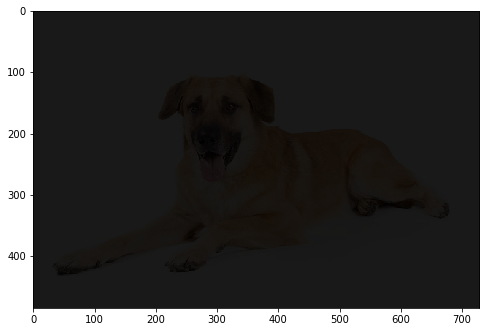

In [87]:
img_filter_hsv = filter_hsv(img,'value', 0.1)
plt.figure(figsize=(8, 8))
plt.imshow(img_filter_hsv)